### Step 1: Problem Statement

A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?

#### Objective:

1) Understand the Dataset & cleanup (if required).
2) Build Regression models to predict the sales w.r.t a single & multiple feature.
3) Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

In [2]:
#importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

### Step 2: Data Preparation
The dataset is a CSV file named "Housing.csv" taken from kaggle and free to use according to the Kaggle website's public domain policy.
The link of the dataset: https://www.kaggle.com/datasets/shivamsingh163248/housing-price-prediction

##### Acknowledgement:
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.
Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

The dataset consists of 12 independent features and 1 target variable (price). The features include:
- price: The price of the house in USD
- area: The area of the house in square feet
- bedrooms: The number of bedrooms in the house
- bathrooms: The number of bathrooms in the house
- stories: The number of stories in the house
- mainroad: Whether the house is near the main road (yes/no)
- guestroom: Whether the house has a guest room (yes/no)
- basement: Whether the house has a basement (yes/no)
- hotwaterheating: Whether the house has hot water heating (yes/no)
- airconditioning: Whether the house has air conditioning (yes/no)
- parking: Whether the house has a parking space (number of parking spaces)
- prefarea: Whether the house is a preferred area (yes/no)
- furnishingstatus: The status of the house (furnished/unfurnished/semi-furnished)

In [3]:
# Using pandas to load the dataset from the CSV file
df = pd.read_csv("Housing.csv")

In [4]:
# printing the first few rows of the dataset to get a sense of the data
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# checking the shape of the dataset (rows, columns)
df.shape

(545, 13)

In [6]:
# checking for the presence of any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
# checking the statistical summary of the dataset to get insights into the data
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Step 3: Data Cleaning

In [8]:
# checking for null values in the dataset
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
# checking for any duplicated rows in the dataset
df.duplicated().sum()

np.int64(0)

### Step 4: Data Visualization

<Axes: ylabel='price'>

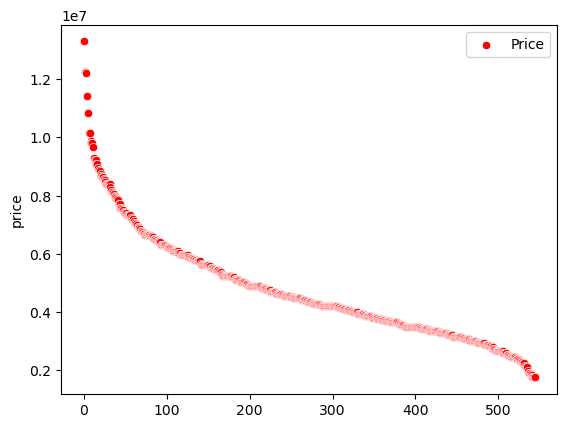

In [10]:
sns.scatterplot(df['price'], label='Price', color='red')

<Axes: ylabel='price'>

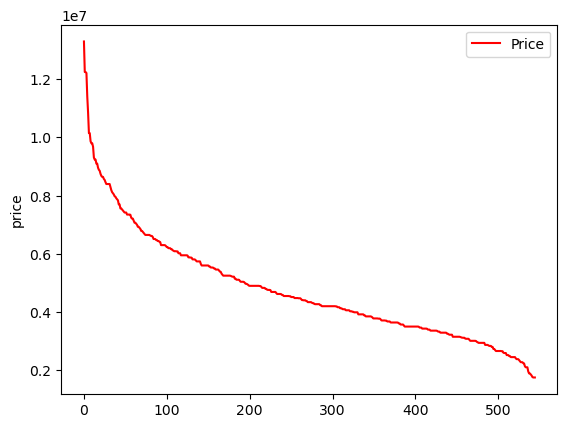

In [11]:
sns.lineplot(df['price'], label='Price', color='red')

<Axes: xlabel='area', ylabel='price'>

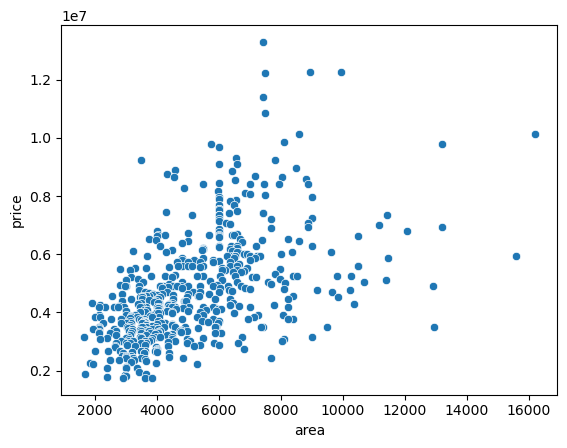

In [12]:
sns.scatterplot(x=df['area'], y=df['price'])

<Axes: xlabel='bedrooms', ylabel='price'>

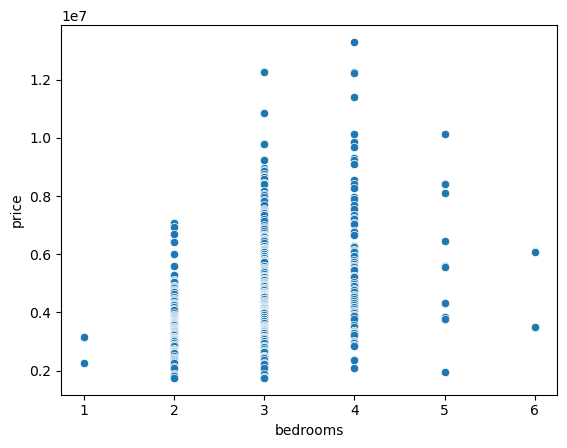

In [13]:
sns.scatterplot(x=df['bedrooms'], y=df['price'])

<Axes: xlabel='bathrooms', ylabel='price'>

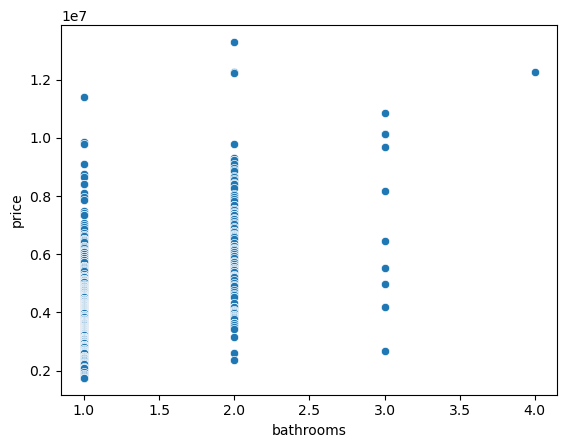

In [14]:
sns.scatterplot(x=df['bathrooms'], y=df['price'])

<Axes: xlabel='stories', ylabel='price'>

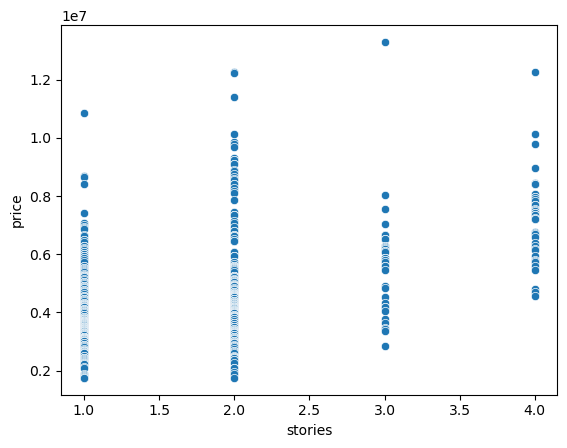

In [15]:
sns.scatterplot(x=df['stories'], y=df['price'])

<Axes: xlabel='mainroad', ylabel='price'>

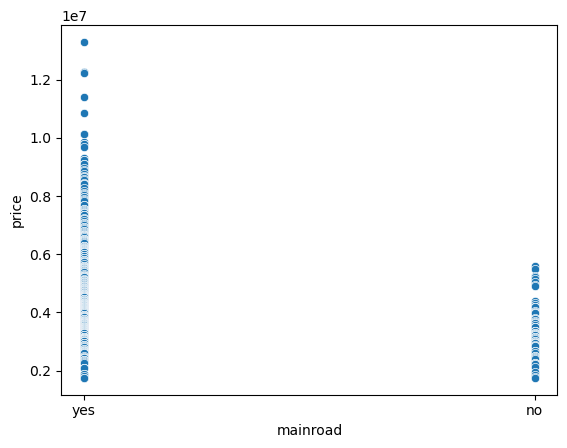

In [16]:
sns.scatterplot(x=df['mainroad'], y=df['price'])

<Axes: xlabel='guestroom', ylabel='price'>

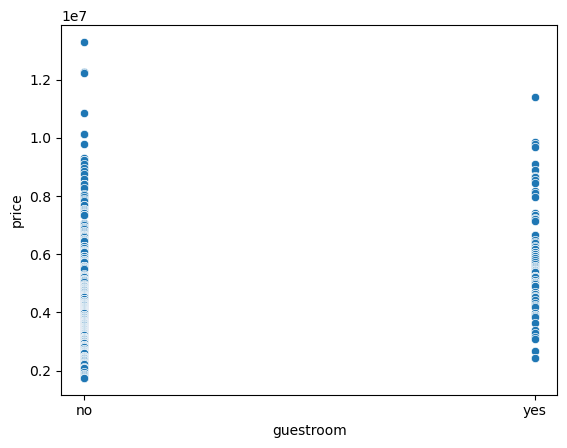

In [17]:
sns.scatterplot(x=df['guestroom'], y=df['price'])

<Axes: xlabel='basement', ylabel='price'>

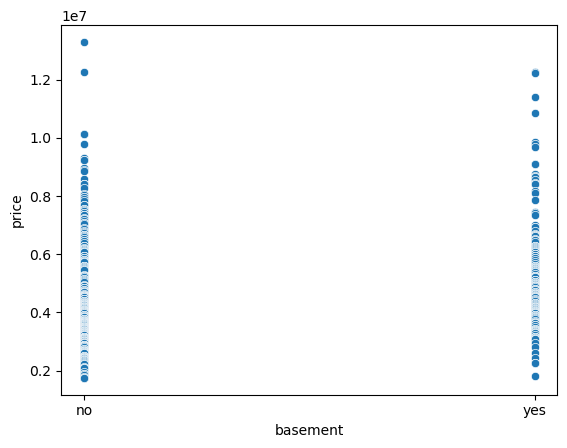

In [18]:
sns.scatterplot(x=df['basement'], y=df['price'])

<Axes: xlabel='hotwaterheating', ylabel='price'>

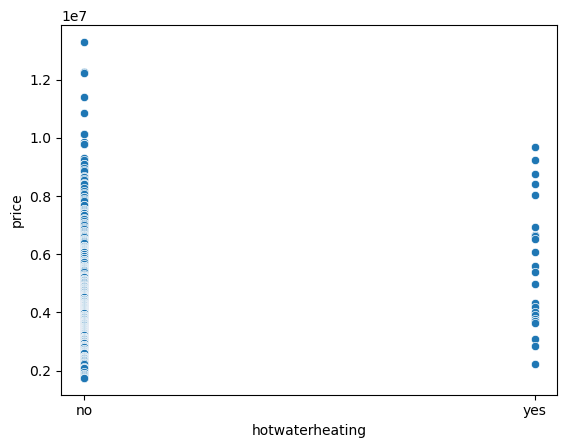

In [19]:
sns.scatterplot(x=df['hotwaterheating'], y=df['price'])

<Axes: xlabel='airconditioning', ylabel='price'>

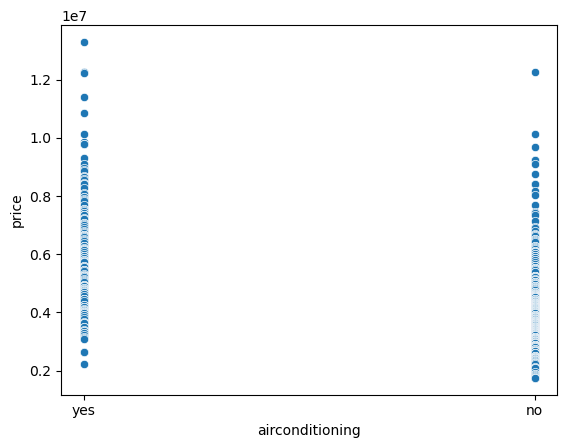

In [20]:
sns.scatterplot(x=df['airconditioning'], y=df['price'])

<Axes: xlabel='parking', ylabel='price'>

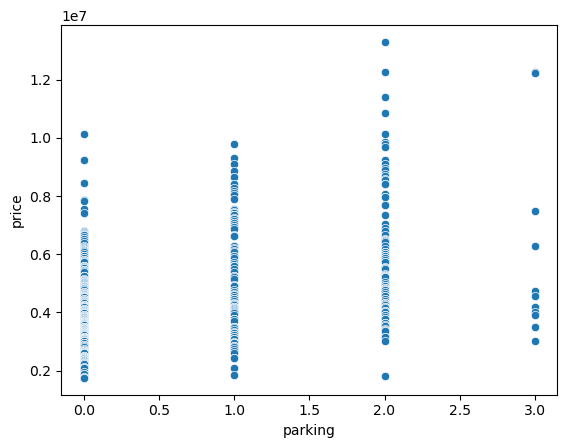

In [21]:
sns.scatterplot(x=df['parking'], y=df['price'])

<Axes: xlabel='prefarea', ylabel='price'>

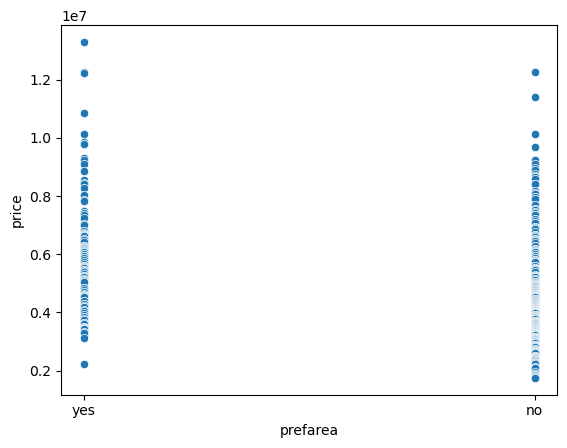

In [22]:
sns.scatterplot(x=df['prefarea'], y=df['price'])

<Axes: xlabel='furnishingstatus', ylabel='price'>

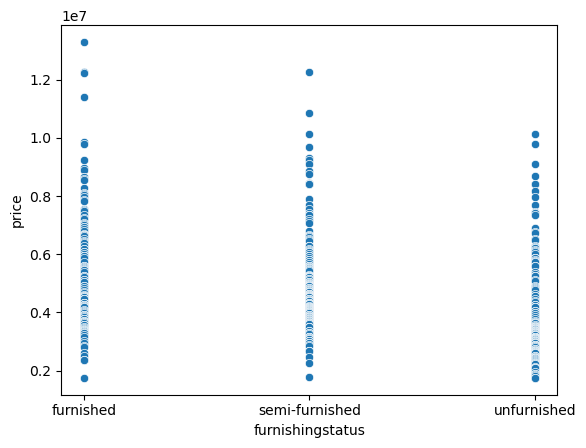

In [23]:
sns.scatterplot(x=df['furnishingstatus'], y=df['price'])

### Step 5: Feature Engineering

Since we are working on simple linear regression, we will focus on the single feature model.
To selecting the most relevant features, we need to use the correlation analysis to find the relationship between the target variable (price) and the selected feature.

To find the correlation between the target variable and the selected feature, we first need to convert the categorical variables into numerical variables. Then, we can calculate the correlation. We will use two methods to find the most relevant features. The first method is using the `.corr()` method which uses the pearson method by default to find the correlation matrix, while the second method is using sns pairplot for visualization. The sns pairplot method provides a visual representation of the relationship between the variables, and does not calculate the correaltion, but it provides a visual representation of the relationship between the features and the target variable


In [24]:
df.dtypes.value_counts()

object    7
int64     6
Name: count, dtype: int64

In [25]:
numerical_features = df.select_dtypes(include=['int64']).columns
print(len(numerical_features))
print(numerical_features)

6
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')


In [26]:
categorical_features = df.select_dtypes(include=['object']).columns
print(len(categorical_features))
print(categorical_features)

7
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [27]:
for col in categorical_features:
    print("-"*20)
    print(df[col].value_counts())

--------------------
mainroad
yes    468
no      77
Name: count, dtype: int64
--------------------
guestroom
no     448
yes     97
Name: count, dtype: int64
--------------------
basement
no     354
yes    191
Name: count, dtype: int64
--------------------
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
--------------------
airconditioning
no     373
yes    172
Name: count, dtype: int64
--------------------
prefarea
no     417
yes    128
Name: count, dtype: int64
--------------------
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [28]:
# converting categorical variables into numerical variables manually using the map and apply function
for col in categorical_features:
    if col!= 'furnishingstatus':
        df[col] = df[col].map({'yes': 1, 'no': 0})

In [29]:
df.head(15)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


In [30]:
# using one-hot encoding for the categorical variable 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
df.head(15)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,True,False
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,True,False
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,False,True
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,False,False
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,False,True


<Axes: >

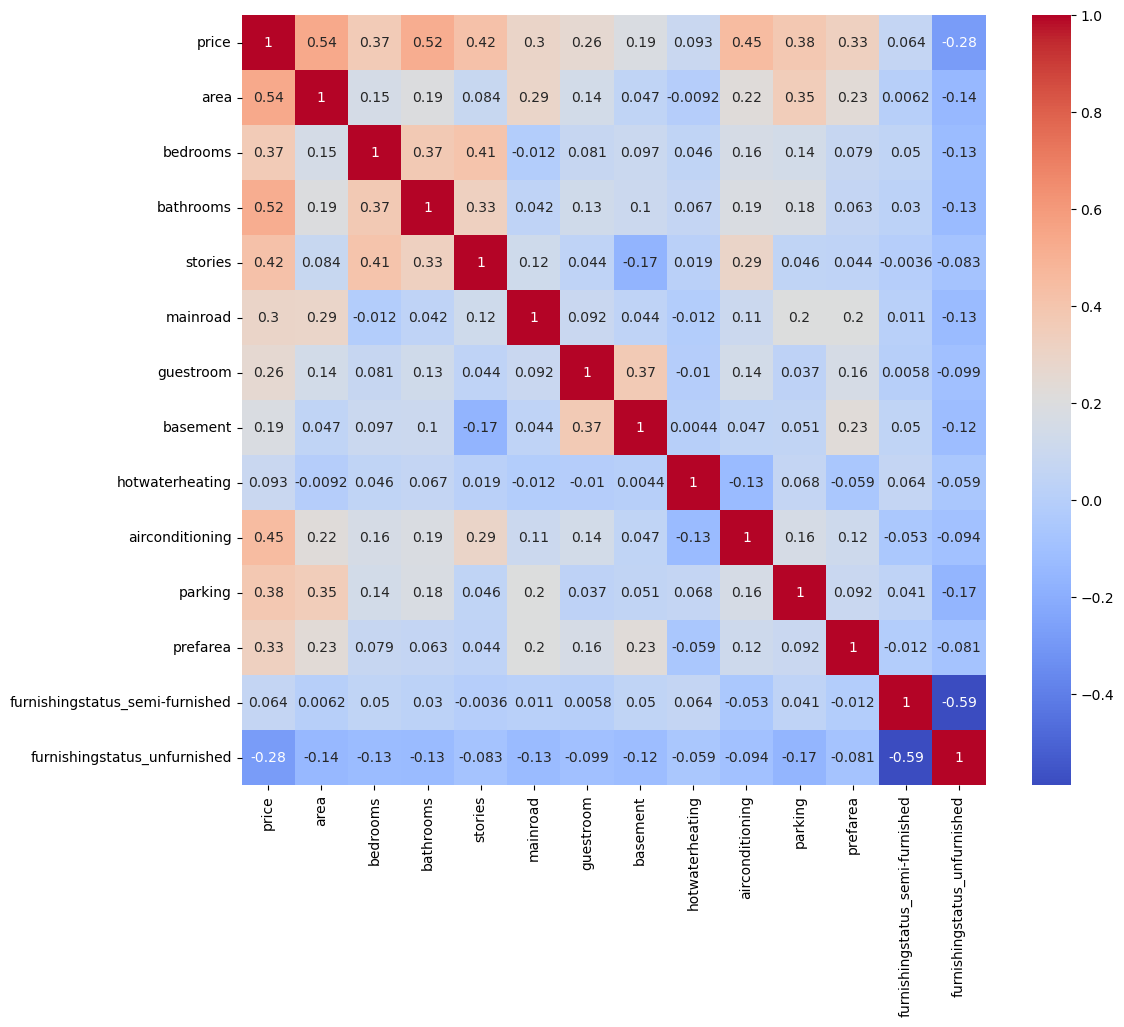

In [31]:
correalation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correalation_matrix, annot=True, cmap='coolwarm')

### Observations:
The correlation analysis shows that the area of the house has a strong positive relationship with the price. This means that as the area of the house increases, the price also increases. So for our simple linear regression model, we will consider the area of the house as the feature.

However, there are some other correlations that need to be considered for the predictive model, such as the presence of other features that may have a stronger relationship with the price. But since our goal is to build a simple linear regression model, we will focus on area feature for now.

In the next notebook file, I will buid a multiple feature model to predict the price based on the featueres that have a stronger relationship with the price. The link will be published here after its been completed. The overall structure of that notebook will be similar to this one, with just a few modifications to the model building and evaluation steps.

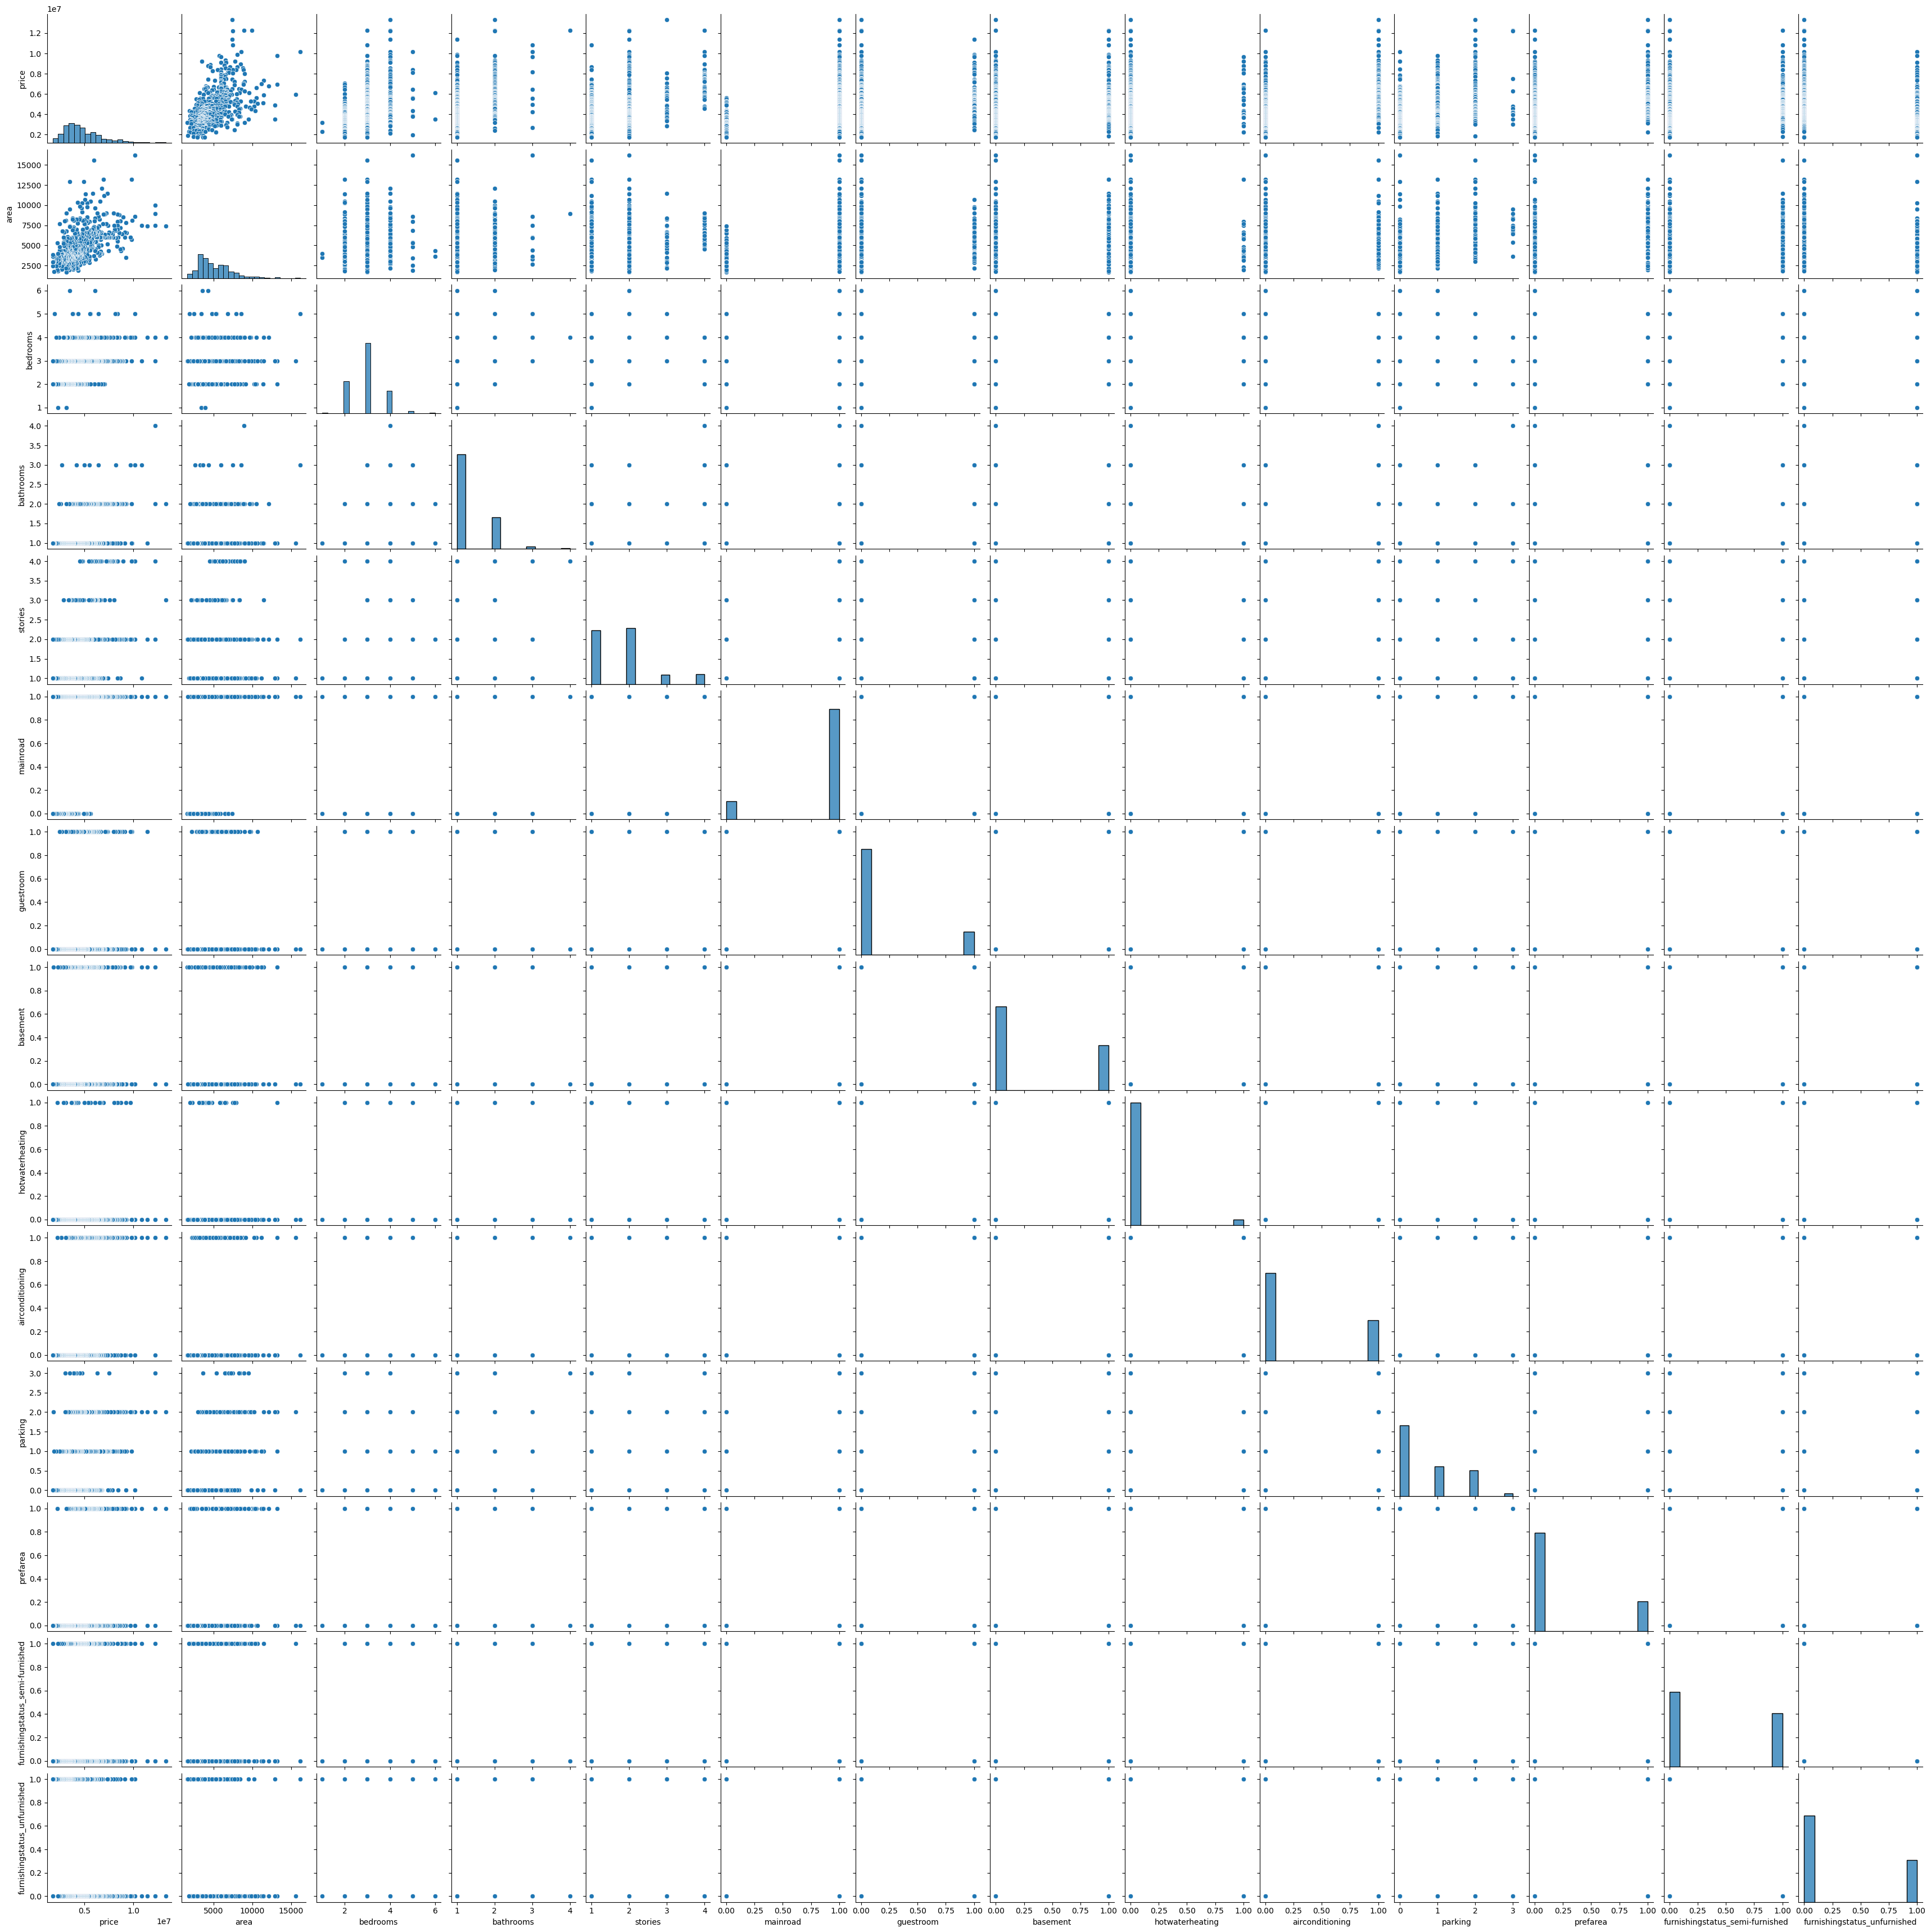

In [41]:
sns.pairplot(df)

### Step 5: Model Building

In [32]:
# splitting the dataset into features (idv) and target variable (y)
idv = df[['area', 'bedrooms', 'bathrooms','stories', 'airconditioning', 'parking', 'prefarea']]
target = df['price']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(idv, target, test_size=0.2, random_state=7)

print("Training set size:", x_train.shape)
print("Testing set size:", x_test.shape)
print("Target variable (price) training set size:", y_train.shape)
print("Target variable (price) testing set size:", y_test.shape)

Training set size: (436, 7)
Testing set size: (109, 7)
Target variable (price) training set size: (436,)
Target variable (price) testing set size: (109,)


In [47]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

### Step 6: Model Evaluation

In [48]:
y_hat = mlr.predict(x_test)

<Axes: xlabel='price'>

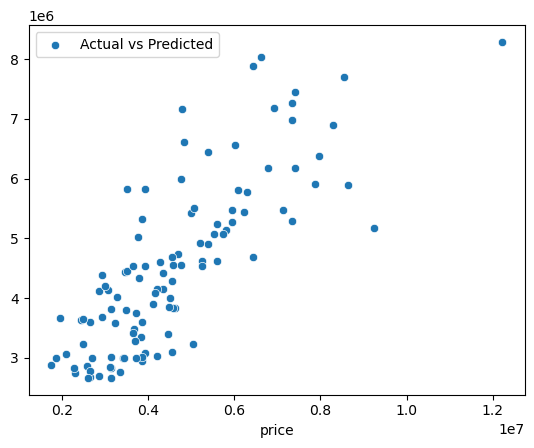

In [49]:
sns.scatterplot(x=y_test, y= y_hat, label='Actual vs Predicted')

In [50]:
mse = mean_squared_error(y_hat,y_test)
mse

1209824953548.7273

In [51]:
rmse = root_mean_squared_error(y_hat,y_test)
rmse

1099920.4305533774

In [52]:
mlr_mae = mean_absolute_error(y_hat,y_test)
mlr_mae

828288.9600841299

In [53]:
r2 = r2_score(y_hat,y_test)
r2

0.3907255430633486

### Step 7: Model Deployment

In [ ]:
# To use the model for prediction, you can use the following function:
def predict_house_price(*args):
    return mlr.predict([[*args]])[0]

# Example usage:
predicted_price = predict_house_price(3000,3,2,2,1,3,0)
predicted_price

c:\Users\Altamas\anaconda3\envs\py-tf-torch-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(6029660.861496002)